### Notebook for running SONATA on scGEM dataset
Below, we replicate our results for scGEM dataset reported in *Securing diagonal integration of multimodal single-cell data against ambiguous mapping*




In [1]:
import os
import yaml
from sklearn.preprocessing import normalize
from types import SimpleNamespace

import sys
sys.path.append(os.path.dirname(os.getcwd()))
import sonata
from run_baselines.scot import scotv1
from utils.utils import *
from utils.vis import *

/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load parameters and datasets
with open("./cfgs/scGEM.yaml", "r") as file:
        params = yaml.safe_load(file)
params = SimpleNamespace(**params)
        
data_url1 = os.path.join(params.data_path, params.data_url1)
data_url2 = os.path.join(params.data_path, params.data_url2)
print("data url1 = {}\ndata url2 = {}".format(data_url1, data_url2))
assert os.path.isfile(data_url1) and os.path.isfile(data_url2)

label_url1 = os.path.join(params.data_path, params.label_url1)
label_url2 = os.path.join(params.data_path, params.label_url2)
assert os.path.isfile(label_url1) and os.path.isfile(label_url2)

data1 = load_data(data_url1, )
data2 = load_data(data_url2, )
print("data size: data1 = {}, data2 = {}".format(data1.shape, data2.shape))

label1 = load_data(label_url1, ).astype(int)
label2 = load_data(label_url2, ).astype(int)

# create links for FOSCTTM, all datasets follow 1-1 correspondence
links = np.array(list(zip([i for i in range(data1.shape[0])], [i for i in range(data2.shape[0])])))

if params.norm:
        data1 = normalize(data1, norm=params.norm)
        data2 = normalize(data2, norm=params.norm)

if params.sort_label: 
        data1, label1, _ = sorted_by_label(data1, label1)
        data2, label2, _ = sorted_by_label(data2, label2)
        
print("data1 shape={}\tdata2 shape={}".format(data1.shape, data2.shape))
print("label1 shape={}\tlabel2 shape={}".format(label1.shape, label2.shape))


data url1 = ../../data/scGEM/scGEM_expression.csv
data url2 = ../../data/scGEM/scGEM_methylation.csv
data size: data1 = (177, 34), data2 = (177, 27)
data1 shape=(177, 34)	data2 shape=(177, 27)
label1 shape=(177,)	label2 shape=(177,)


### 1. visualize two modalities

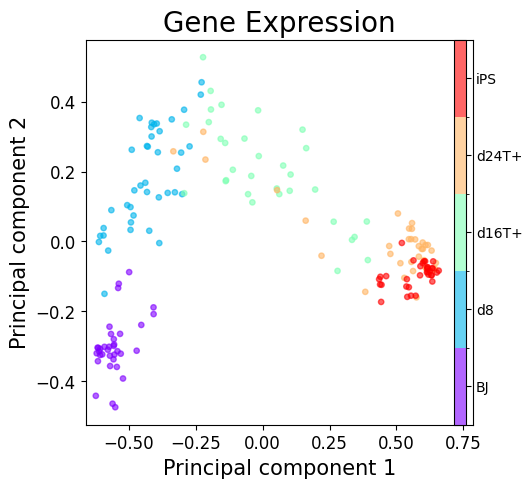

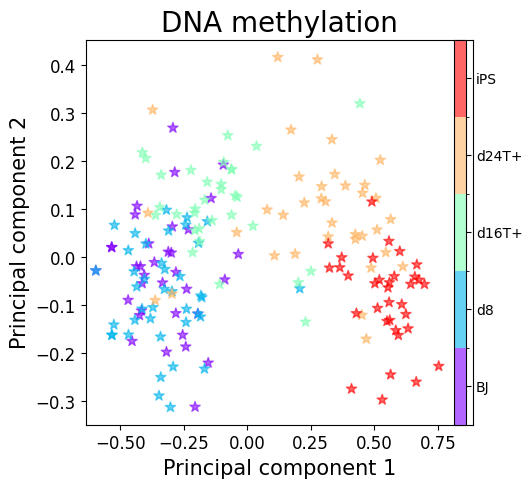

In [3]:
plt_domain_bio_labels(data1, label1, title="Gene Expression", y_tick_labels=["BJ", "d8", "d16T+", "d24T+", "iPS"], marker='.', a=0.6, show=True)
plt_domain_bio_labels(data2, label2, title="DNA methylation", y_tick_labels=["BJ", "d8", "d16T+", "d24T+", "iPS"], marker='*', a=0.6, show=True)

### 2. SONATA Diagnose

##### 2.1 Diagnose Modality1

In [4]:
sn1 = sonata.sonata(noise_scale=params.noise_scale, n_neighbor=params.n_neighbor, n_cluster=params.n_cluster)
DiagnoseResult1 = sn1.diagnose(data1, save_dir=os.path.join(params.save_dir, "Modality1"))

/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_neighbor=10, noise_scale=0.3, scaleOT = False, scale_sample_rate = 0.1


  0%|          | 0/10 [00:00<?, ?it/s]

---------------OT Alignment Iter=0--------------
It.  |Err         
-------------------
    0|1.057554e-02|


/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


   10|1.846127e-03|
   20|4.431253e-04|
   30|1.328448e-04|
   40|3.698969e-05|
   50|1.251012e-05|
   60|4.945024e-06|
   70|2.307553e-06|
   80|1.184563e-06|
   90|6.301750e-07|
  100|3.388733e-07|
  110|1.827496e-07|
  120|9.861729e-08|
  130|5.322096e-08|
  140|2.872072e-08|
  150|1.549846e-08|
  160|8.363115e-09|
  170|4.512731e-09|
  180|2.435039e-09|
  190|1.313923e-09|


 10%|█         | 1/10 [00:12<01:54, 12.70s/it]

It.  |Err         
-------------------
  200|7.089768e-10|
---------------OT Alignment Iter=1--------------
It.  |Err         
-------------------
    0|1.058391e-02|


/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


   10|1.274946e-03|
   20|2.924392e-04|
   30|2.057903e-04|
   40|2.385446e-04|
   50|3.857284e-04|
   60|4.958821e-04|
   70|2.434054e-04|
   80|1.410859e-04|
   90|9.113324e-05|
  100|6.122397e-05|
  110|4.110949e-05|
  120|2.723152e-05|
  130|1.778353e-05|
  140|1.148509e-05|
  150|7.360328e-06|
  160|4.693116e-06|
  170|2.982804e-06|
  180|1.891946e-06|
  190|1.198516e-06|
It.  |Err         
-------------------
  200|7.586428e-07|
  210|4.799748e-07|
  220|3.035759e-07|
  230|1.919702e-07|
  240|1.213806e-07|
  250|7.674199e-08|
  260|4.851734e-08|
  270|3.067247e-08|
  280|1.939067e-08|
  290|1.225836e-08|
  300|7.749413e-09|
  310|4.898957e-09|
  320|3.096973e-09|
  330|1.957809e-09|
  340|1.237666e-09|


 20%|██        | 2/10 [00:34<02:23, 17.94s/it]

  350|7.824112e-10|
---------------OT Alignment Iter=2--------------
It.  |Err         
-------------------
    0|1.047950e-02|


/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


   10|5.942711e-04|
   20|1.515395e-04|
   30|1.509559e-04|
   40|1.754059e-04|
   50|1.483536e-04|
   60|1.140685e-04|
   70|9.807086e-05|
   80|9.612208e-05|
   90|9.114054e-05|
  100|6.467972e-05|
  110|3.370209e-05|
  120|1.659095e-05|
  130|8.960722e-06|
  140|5.173395e-06|
  150|3.054675e-06|
  160|1.812997e-06|
  170|1.076796e-06|
  180|6.394568e-07|
  190|3.796765e-07|
It.  |Err         
-------------------
  200|2.254094e-07|
  210|1.338165e-07|
  220|7.944011e-08|
  230|4.715935e-08|
  240|2.799599e-08|
  250|1.661975e-08|
  260|9.866294e-09|
  270|5.857121e-09|
  280|3.477081e-09|
  290|2.064172e-09|
  300|1.225397e-09|


 30%|███       | 3/10 [00:57<02:21, 20.18s/it]

  310|7.274585e-10|
---------------OT Alignment Iter=3--------------
It.  |Err         
-------------------
    0|1.062849e-02|


/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


   10|1.945280e-03|
   20|3.077544e-04|
   30|5.459903e-05|
   40|1.154436e-05|
   50|3.091817e-06|
   60|9.654662e-07|
   70|3.201046e-07|
   80|1.085115e-07|
   90|3.714318e-08|
  100|1.277822e-08|
  110|4.408719e-09|
  120|1.523716e-09|


 40%|████      | 4/10 [01:05<01:33, 15.63s/it]

  130|5.271766e-10|
---------------OT Alignment Iter=4--------------
It.  |Err         
-------------------
    0|1.134311e-02|


/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


   10|2.001037e-03|
   20|3.094348e-03|
   30|9.361097e-04|
   40|9.944541e-04|
   50|4.913155e-04|
   60|1.108322e-04|
   70|4.370738e-05|
   80|1.880842e-05|
   90|8.478397e-06|
  100|3.934921e-06|
  110|1.859009e-06|
  120|8.874122e-07|
  130|4.260913e-07|
  140|2.052487e-07|
  150|9.904400e-08|
  160|4.784113e-08|
  170|2.312133e-08|
  180|1.117790e-08|
  190|5.404891e-09|
It.  |Err         
-------------------
  200|2.613733e-09|
  210|1.264052e-09|


 50%|█████     | 5/10 [01:19<01:14, 14.98s/it]

  220|6.113463e-10|
---------------OT Alignment Iter=5--------------
It.  |Err         
-------------------
    0|1.033265e-02|


/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


   10|1.194650e-03|
   20|4.858117e-04|
   30|3.079338e-04|
   40|2.404499e-04|
   50|7.916533e-05|
   60|2.339772e-05|
   70|8.006497e-06|
   80|3.024577e-06|
   90|1.190288e-06|
  100|4.756422e-07|
  110|1.911728e-07|
  120|7.701080e-08|
  130|3.105033e-08|
  140|1.252394e-08|
  150|5.052290e-09|
  160|2.038342e-09|


 60%|██████    | 6/10 [01:32<00:57, 14.25s/it]

  170|8.224249e-10|
---------------OT Alignment Iter=6--------------
It.  |Err         
-------------------
    0|1.043408e-02|


/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


   10|1.915732e-03|
   20|9.620837e-05|
   30|5.269032e-06|
   40|4.717392e-07|
   50|5.285225e-08|
   60|6.310804e-09|


 70%|███████   | 7/10 [01:38<00:34, 11.41s/it]

   70|7.742917e-10|
---------------OT Alignment Iter=7--------------
It.  |Err         
-------------------
    0|1.055947e-02|


/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


   10|2.617999e-03|
   20|2.111145e-04|
   30|3.518611e-05|
   40|8.079349e-06|
   50|2.054987e-06|
   60|5.615257e-07|
   70|1.624197e-07|
   80|4.898049e-08|
   90|1.518547e-08|
  100|4.788826e-09|
  110|1.525359e-09|


 80%|████████  | 8/10 [01:45<00:20, 10.16s/it]

  120|4.886571e-10|
---------------OT Alignment Iter=8--------------
It.  |Err         
-------------------
    0|1.090575e-02|


/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


   10|1.400464e-03|
   20|1.182492e-04|
   30|1.210870e-05|
   40|5.430980e-06|
   50|2.820984e-06|
   60|1.464776e-06|
   70|7.597969e-07|
   80|3.939018e-07|
   90|2.041478e-07|
  100|1.057852e-07|
  110|5.481027e-08|
  120|2.839718e-08|
  130|1.471212e-08|
  140|7.621991e-09|
  150|3.948732e-09|
  160|2.045713e-09|
  170|1.059817e-09|


 90%|█████████ | 9/10 [01:56<00:10, 10.40s/it]

  180|5.490548e-10|
---------------OT Alignment Iter=9--------------
It.  |Err         
-------------------
    0|1.035133e-02|


/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


   10|1.720794e-03|
   20|4.164075e-04|
   30|5.110128e-04|
   40|4.958282e-04|
   50|9.886860e-04|
   60|7.155035e-04|
   70|5.092881e-04|
   80|8.875470e-05|
   90|2.696579e-05|
  100|1.412651e-05|
  110|8.832865e-06|
  120|5.810673e-06|
  130|3.922205e-06|
  140|2.693855e-06|
  150|1.873163e-06|
  160|1.314009e-06|
  170|9.275679e-07|
  180|6.577116e-07|
  190|4.678549e-07|
It.  |Err         
-------------------
  200|3.335620e-07|
  210|2.382042e-07|
  220|1.703054e-07|
  230|1.218623e-07|
  240|8.725092e-08|
  250|6.249658e-08|
  260|4.477913e-08|
  270|3.209153e-08|
  280|2.300242e-08|
  290|1.648943e-08|
  300|1.182151e-08|
  310|8.475500e-09|
  320|6.076813e-09|
  330|4.357118e-09|
  340|3.124151e-09|
  350|2.240121e-09|
  360|1.606260e-09|
  370|1.151762e-09|


100%|██████████| 10/10 [02:19<00:00, 13.94s/it]

  380|8.258740e-10|
---------------Coupling Denoising Iter=0--------------
---------------Coupling Denoising Iter=1--------------
---------------Coupling Denoising Iter=2--------------
---------------Coupling Denoising Iter=3--------------
---------------Coupling Denoising Iter=4--------------
---------------Coupling Denoising Iter=5--------------
---------------Coupling Denoising Iter=6--------------
---------------Coupling Denoising Iter=7--------------
---------------Coupling Denoising Iter=8--------------
---------------Coupling Denoising Iter=9--------------


Outlier cluster indices=[ 12  23  43  66  74  76  89 105 138 139]
iter=0	include_indices=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  67  68  69  70  71  72  73  75
  77  78  79  80  81  82  83  84  85  86  87  88  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 140 141 142 143 144 145 146]	exclude_indices=[ 23  43  66  74  76  89 105 138 139]
length of include_indices=138	exclude_indices=9
deciding best k for clustering ...
cannot_link shape=1843
data_shape = (152, 34)
k=1
k=2
k=3
k=4
k=5
k=6
k=7
k=8
k=9
k=10
K = 2 groups choosen by elbow method
Ambiguous group 0 = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22

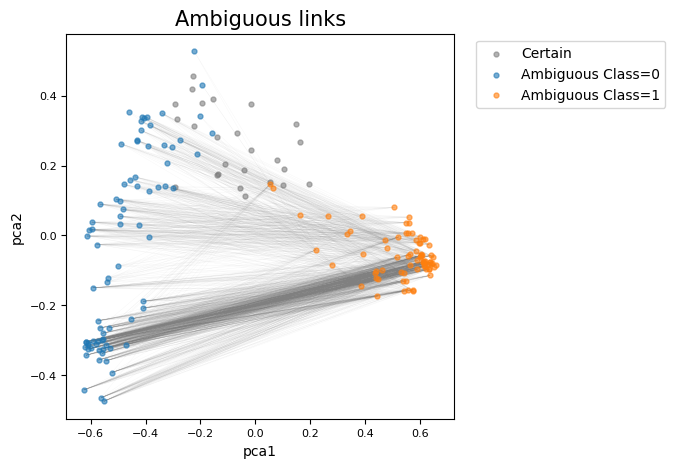

In [5]:
plt_cannotlink_by_labelcolor(data1, DiagnoseResult1.ambiguous_idx, DiagnoseResult1.ambiguous_labels, DiagnoseResult1.cannot_links, alpha=0.6, cl_alpha = 0.1, show=True)

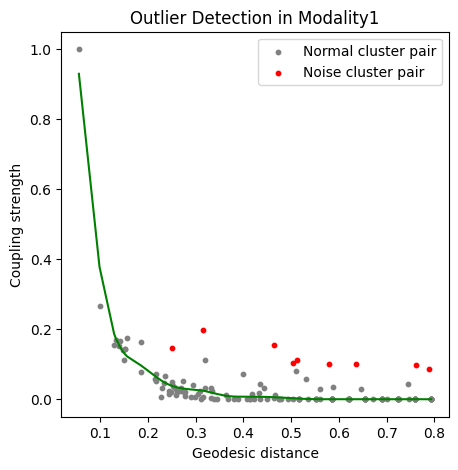

In [6]:
scatter_x = sn1.spline_data.spline_dist
scatter_y = sn1.spline_data.spline_coupling
include_indices = sn1.spline_data.include_indices
exclude_indices = sn1.spline_data.exclude_indices
spline_x = sn1.spline_data.spline_x
spline_y = sn1.spline_data.spline_y
        
plt_fit_spline(scatter_x, scatter_y, include_indices, exclude_indices, spline_x, spline_y, title="Outlier Detection in Modality1", show=True)

#### 2.2 Diagnose Modality 2

In [7]:
sn2 = sonata.sonata(noise_scale=params.noise_scale, n_neighbor=params.n_neighbor, n_cluster=params.n_cluster)
DiagnoseResult2 = sn2.diagnose(data2, save_dir=os.path.join(params.save_dir, "Modality2"))

/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_neighbor=10, noise_scale=0.3, scaleOT = False, scale_sample_rate = 0.1


  0%|          | 0/10 [00:00<?, ?it/s]

---------------OT Alignment Iter=0--------------
It.  |Err         
-------------------
    0|1.019033e-02|


/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


   10|3.314241e-03|
   20|1.991969e-03|
   30|6.926988e-04|
   40|9.838914e-04|
   50|1.089882e-03|
   60|6.565155e-04|
   70|2.646677e-04|
   80|9.442910e-05|
   90|4.069313e-05|
  100|2.004858e-05|
  110|1.040930e-05|
  120|5.482977e-06|
  130|2.895741e-06|
  140|1.529004e-06|
  150|8.068320e-07|
  160|4.255394e-07|
  170|2.243661e-07|
  180|1.182750e-07|
  190|6.234231e-08|
It.  |Err         
-------------------
  200|3.285848e-08|
  210|1.731802e-08|
  220|9.127282e-09|
  230|4.810396e-09|
  240|2.535234e-09|
  250|1.336147e-09|


 10%|█         | 1/10 [00:16<02:26, 16.25s/it]

  260|7.041890e-10|
---------------OT Alignment Iter=1--------------
It.  |Err         
-------------------
    0|1.045944e-02|


/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


   10|3.579838e-03|
   20|3.579742e-03|
   30|9.010952e-04|
   40|5.720531e-04|
   50|4.171959e-04|
   60|4.506020e-04|
   70|3.582180e-04|
   80|2.106719e-04|
   90|2.125741e-04|
  100|1.002832e-03|
  110|1.685778e-03|
  120|9.366243e-04|
  130|3.856771e-04|
  140|3.894158e-04|
  150|5.017122e-04|
  160|4.079906e-04|
  170|9.987264e-04|
  180|7.235376e-04|
  190|2.912579e-04|
It.  |Err         
-------------------
  200|3.482254e-04|
  210|3.426953e-04|
  220|2.308961e-04|
  230|2.391115e-04|
  240|2.702627e-04|
  250|6.471332e-05|
  260|3.380322e-05|
  270|2.368429e-05|
  280|1.850654e-05|
  290|1.560096e-05|
  300|1.396817e-05|
  310|1.315882e-05|
  320|1.296759e-05|
  330|1.332045e-05|
  340|1.423293e-05|
  350|1.580169e-05|
  360|1.821618e-05|
  370|2.178322e-05|
  380|2.694393e-05|
  390|3.420304e-05|
It.  |Err         
-------------------
  400|4.371357e-05|
  410|5.400932e-05|
  420|6.021578e-05|
  430|5.622452e-05|
  440|4.303044e-05|
  450|2.832752e-05|
  460|1.708472e-05|
  

 20%|██        | 2/10 [00:55<03:59, 29.99s/it]

  630|6.636966e-10|
---------------OT Alignment Iter=2--------------
It.  |Err         
-------------------
    0|1.075751e-02|


/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


   10|3.685167e-03|
   20|1.599414e-03|
   30|1.143951e-03|
   40|5.518941e-04|
   50|1.600591e-04|
   60|6.883402e-05|
   70|3.419509e-05|
   80|1.870379e-05|
   90|1.078345e-05|
  100|6.396086e-06|
  110|3.854957e-06|
  120|2.345318e-06|
  130|1.434951e-06|
  140|8.809857e-07|
  150|5.420259e-07|
  160|3.339168e-07|
  170|2.058765e-07|
  180|1.269966e-07|
  190|7.836306e-08|
It.  |Err         
-------------------
  200|4.836303e-08|
  210|2.985156e-08|
  220|1.842690e-08|
  230|1.137515e-08|
  240|7.022215e-09|
  250|4.335094e-09|
  260|2.676257e-09|
  270|1.652189e-09|
  280|1.019984e-09|


 30%|███       | 3/10 [01:15<02:55, 25.12s/it]

  290|6.296924e-10|
---------------OT Alignment Iter=3--------------
It.  |Err         
-------------------
    0|9.883702e-03|


/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


   10|3.928913e-03|
   20|1.519515e-03|
   30|8.358303e-04|
   40|1.121394e-03|
   50|6.581912e-04|
   60|2.423712e-04|
   70|3.252812e-04|
   80|2.762024e-04|
   90|8.935811e-04|
  100|3.358778e-04|
  110|9.904678e-05|
  120|5.138860e-05|
  130|3.675048e-05|
  140|3.386013e-05|
  150|3.565572e-05|
  160|3.987579e-05|
  170|4.602285e-05|
  180|5.412125e-05|
  190|6.424317e-05|
It.  |Err         
-------------------
  200|7.609225e-05|
  210|8.835665e-05|
  220|9.880340e-05|
  230|1.072965e-04|
  240|1.188813e-04|
  250|1.382705e-04|
  260|1.502031e-04|
  270|1.252656e-04|
  280|9.304754e-05|
  290|6.406606e-05|
  300|3.596797e-05|
  310|1.733773e-05|
  320|7.951703e-06|
  330|3.664993e-06|
  340|1.718753e-06|
  350|8.165611e-07|
  360|3.905737e-07|
  370|1.873453e-07|
  380|8.994639e-08|
  390|4.319137e-08|
It.  |Err         
-------------------
  400|2.073857e-08|
  410|9.956627e-09|
  420|4.779774e-09|
  430|2.294451e-09|
  440|1.101383e-09|


 40%|████      | 4/10 [01:44<02:40, 26.68s/it]

  450|5.286807e-10|
---------------OT Alignment Iter=4--------------
It.  |Err         
-------------------
    0|9.866124e-03|


/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


   10|4.850752e-03|
   20|1.653705e-03|
   30|7.289615e-04|
   40|5.519760e-04|
   50|4.148122e-04|
   60|5.074339e-04|
   70|5.263595e-04|
   80|2.094073e-04|
   90|1.787048e-04|
  100|1.569521e-04|
  110|1.349419e-04|
  120|2.126114e-04|
  130|1.356406e-04|
  140|2.585103e-05|
  150|5.481140e-06|
  160|1.470571e-06|
  170|4.547535e-07|
  180|1.522618e-07|
  190|5.418882e-08|
It.  |Err         
-------------------
  200|2.054980e-08|
  210|8.334474e-09|
  220|3.591825e-09|
  230|1.619537e-09|


 50%|█████     | 5/10 [02:00<01:53, 22.77s/it]

  240|7.514798e-10|
---------------OT Alignment Iter=5--------------
It.  |Err         
-------------------
    0|1.041394e-02|


/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


   10|3.898750e-03|
   20|1.375687e-03|
   30|2.047354e-03|
   40|2.345438e-03|
   50|6.071667e-04|
   60|1.350215e-03|
   70|9.858462e-04|
   80|4.993917e-04|
   90|3.485310e-04|
  100|1.667845e-04|
  110|6.528338e-05|
  120|3.508156e-05|
  130|2.864636e-05|
  140|2.445092e-05|
  150|2.137131e-05|
  160|2.078399e-05|
  170|2.482285e-05|
  180|4.159706e-05|
  190|1.355412e-04|
It.  |Err         
-------------------
  200|7.852670e-04|
  210|8.560675e-05|
  220|1.676171e-05|
  230|5.075212e-06|
  240|1.725765e-06|
  250|6.000580e-07|
  260|2.097113e-07|
  270|7.338729e-08|
  280|2.568928e-08|
  290|8.992789e-09|
  300|3.147892e-09|
  310|1.101860e-09|


 60%|██████    | 6/10 [02:21<01:29, 22.30s/it]

  320|3.856725e-10|
---------------OT Alignment Iter=6--------------
It.  |Err         
-------------------
    0|1.027438e-02|


/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


   10|5.042428e-03|
   20|2.305233e-03|
   30|2.231192e-03|
   40|1.374239e-03|
   50|7.522764e-04|
   60|3.285873e-04|
   70|2.166340e-04|
   80|2.636708e-04|
   90|2.564557e-04|
  100|1.185361e-04|
  110|4.422084e-05|
  120|1.881016e-05|
  130|8.949555e-06|
  140|4.554750e-06|
  150|2.432229e-06|
  160|1.346845e-06|
  170|7.653515e-07|
  180|4.423929e-07|
  190|2.584361e-07|
It.  |Err         
-------------------
  200|1.519300e-07|
  210|8.964693e-08|
  220|5.300902e-08|
  230|3.138286e-08|
  240|1.859250e-08|
  250|1.101936e-08|
  260|6.532427e-09|
  270|3.873028e-09|
  280|2.296468e-09|
  290|1.361727e-09|


 70%|███████   | 7/10 [02:42<01:05, 21.75s/it]

  300|8.074796e-10|
---------------OT Alignment Iter=7--------------
It.  |Err         
-------------------
    0|1.065363e-02|


/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


   10|3.909326e-03|
   20|2.333936e-03|
   30|1.042254e-03|
   40|9.182662e-04|
   50|2.932177e-04|
   60|1.530681e-04|
   70|2.775130e-04|
   80|3.762339e-04|
   90|8.380169e-05|
  100|4.496754e-05|
  110|3.031703e-05|
  120|2.410761e-05|
  130|2.193866e-05|
  140|2.253158e-05|
  150|2.612475e-05|
  160|3.468778e-05|
  170|5.448677e-05|
  180|1.070910e-04|
  190|2.633804e-04|
It.  |Err         
-------------------
  200|3.290519e-04|
  210|9.843328e-05|
  220|3.520060e-05|
  230|1.625212e-05|
  240|8.363352e-06|
  250|4.529373e-06|
  260|2.520722e-06|
  270|1.424413e-06|
  280|8.119270e-07|
  290|4.651117e-07|
  300|2.672009e-07|
  310|1.537561e-07|
  320|8.856009e-08|
  330|5.103652e-08|
  340|2.942123e-08|
  350|1.696366e-08|
  360|9.781917e-09|
  370|5.640982e-09|
  380|3.253124e-09|
  390|1.876097e-09|
It.  |Err         
-------------------
  400|1.081970e-09|


 80%|████████  | 8/10 [03:09<00:47, 23.57s/it]

  410|6.239900e-10|
---------------OT Alignment Iter=8--------------
It.  |Err         
-------------------
    0|9.890486e-03|


/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


   10|4.820662e-03|
   20|1.809128e-03|
   30|1.459006e-03|
   40|1.413416e-03|
   50|6.782765e-04|
   60|4.472189e-04|
   70|8.960682e-04|
   80|5.137128e-04|
   90|3.521212e-04|
  100|8.104398e-05|
  110|4.764975e-05|
  120|6.615591e-05|
  130|1.622345e-04|
  140|2.347447e-04|
  150|5.307268e-05|
  160|3.783345e-05|
  170|4.244781e-05|
  180|5.243869e-05|
  190|6.543975e-05|
It.  |Err         
-------------------
  200|7.560887e-05|
  210|8.823243e-05|
  220|1.508760e-04|
  230|3.642160e-04|
  240|1.561181e-04|
  250|1.605664e-04|
  260|2.807407e-04|
  270|1.144776e-04|
  280|4.008574e-05|
  290|3.092691e-05|
  300|2.479070e-05|
  310|1.922230e-05|
  320|1.440755e-05|
  330|1.049168e-05|
  340|7.468981e-06|
  350|5.228052e-06|
  360|3.615166e-06|
  370|2.478496e-06|
  380|1.689117e-06|
  390|1.146442e-06|
It.  |Err         
-------------------
  400|7.759444e-07|
  410|5.241842e-07|
  420|3.536540e-07|
  430|2.383941e-07|
  440|1.606045e-07|
  450|1.081553e-07|
  460|7.281526e-08|
  

 90%|█████████ | 9/10 [03:47<00:28, 28.03s/it]

  570|9.332595e-10|
---------------OT Alignment Iter=9--------------
It.  |Err         
-------------------
    0|1.058605e-02|


/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


   10|3.160767e-03|
   20|1.373733e-03|
   30|1.591914e-03|
   40|8.640177e-04|
   50|5.707815e-04|
   60|1.284785e-03|
   70|2.696344e-04|
   80|4.020741e-04|
   90|2.249676e-04|
  100|1.663489e-04|
  110|3.877058e-04|
  120|3.305062e-04|
  130|4.363801e-04|
  140|1.569833e-04|
  150|5.747302e-05|
  160|2.554353e-05|
  170|1.232622e-05|
  180|6.340881e-06|
  190|3.496458e-06|
It.  |Err         
-------------------
  200|2.071955e-06|
  210|1.304524e-06|
  220|8.560901e-07|
  230|5.757501e-07|
  240|3.924564e-07|
  250|2.694534e-07|
  260|1.857273e-07|
  270|1.282970e-07|
  280|8.873729e-08|
  290|6.142206e-08|
  300|4.253493e-08|
  310|2.946427e-08|
  320|2.041402e-08|
  330|1.414541e-08|
  340|9.802529e-09|
  350|6.793360e-09|
  360|4.708113e-09|
  370|3.263020e-09|
  380|2.261516e-09|
  390|1.567416e-09|
It.  |Err         
-------------------
  400|1.086356e-09|


100%|██████████| 10/10 [04:14<00:00, 25.42s/it]

  410|7.529432e-10|
---------------Coupling Denoising Iter=0--------------
---------------Coupling Denoising Iter=1--------------
---------------Coupling Denoising Iter=2--------------
---------------Coupling Denoising Iter=3--------------
---------------Coupling Denoising Iter=4--------------
---------------Coupling Denoising Iter=5--------------
---------------Coupling Denoising Iter=6--------------
---------------Coupling Denoising Iter=7--------------
---------------Coupling Denoising Iter=8--------------
---------------Coupling Denoising Iter=9--------------


Outlier cluster indices=[15]
iter=0	include_indices=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120]	exclude_indices=[]
length of include_indices=121	exclude_indices=0


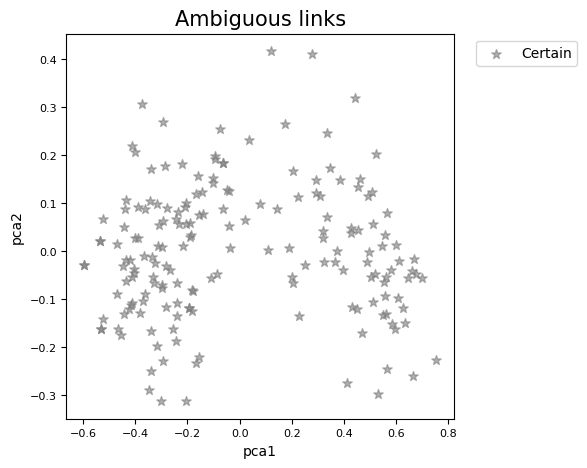

In [8]:
plt_cannotlink_by_labelcolor(data2, DiagnoseResult2.ambiguous_idx, DiagnoseResult2.ambiguous_labels, DiagnoseResult2.cannot_links, alpha=0.6, cl_alpha = 0.1, marker='*', show=True)

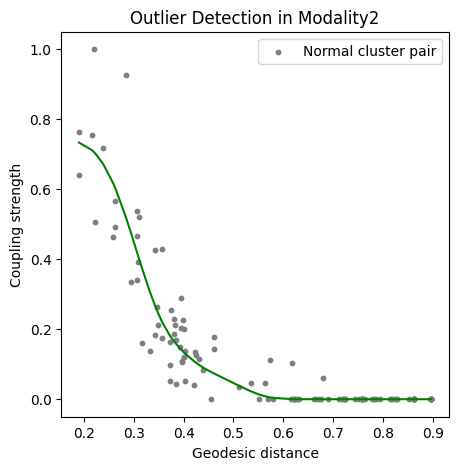

In [9]:
scatter_x = sn2.spline_data.spline_dist
scatter_y = sn2.spline_data.spline_coupling
include_indices = sn2.spline_data.include_indices
exclude_indices = sn2.spline_data.exclude_indices
spline_x = sn2.spline_data.spline_x
spline_y = sn2.spline_data.spline_y
        
plt_fit_spline(scatter_x, scatter_y, include_indices, exclude_indices, spline_x, spline_y, title="Outlier Detection in Modality2", show=True)

### 3. Mapping by SCOT v1 (or any other manifold aligners)

It.  |Err         
-------------------
    0|9.862647e-03|


/home/h46zhou/enter/envs/sonata_public/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


   10|3.851480e-03|
   20|1.142343e-03|
   30|1.554353e-03|
   40|1.194351e-03|
   50|6.173143e-04|
   60|3.083838e-04|
   70|2.793324e-04|
   80|7.965719e-04|
   90|7.717944e-04|
  100|5.102594e-04|
  110|8.096486e-04|
  120|3.850469e-04|
  130|9.940017e-04|
  140|7.354586e-04|
  150|4.918690e-04|
  160|4.497471e-04|
  170|3.923151e-04|
  180|2.422015e-04|
  190|2.597695e-04|
It.  |Err         
-------------------
  200|6.246393e-04|
  210|2.455436e-04|
  220|1.678368e-04|
  230|1.131142e-04|
  240|7.140181e-05|
  250|4.435894e-05|
  260|2.804414e-05|
  270|1.817420e-05|
  280|1.203795e-05|
  290|8.108654e-06|
  300|5.529186e-06|
  310|3.803212e-06|
  320|2.632041e-06|
  330|1.829316e-06|
  340|1.275203e-06|
  350|8.907909e-07|
  360|6.231708e-07|
  370|4.364006e-07|
  380|3.058293e-07|
  390|2.144355e-07|
It.  |Err         
-------------------
  400|1.504089e-07|
  410|1.055270e-07|
  420|7.405173e-08|
  430|5.197147e-08|
  440|3.647848e-08|
  450|2.560582e-08|
  460|1.797473e-08|
  

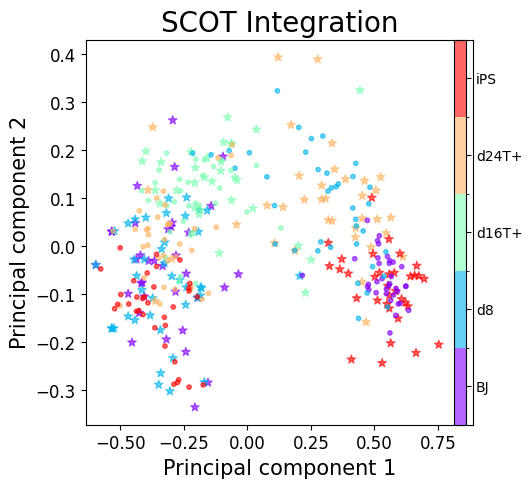

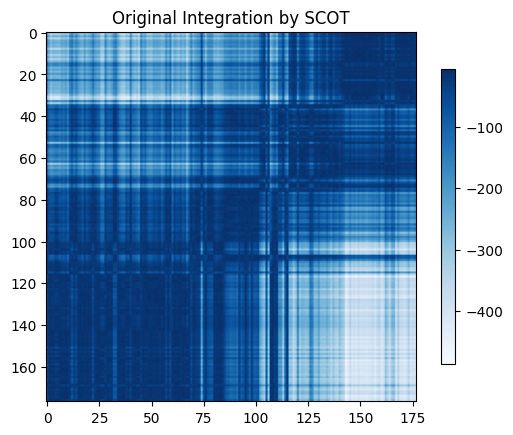

In [10]:
scot = scotv1.SCOT(data1.copy(), data2.copy())
x_aligned, y_aligned = scot.align(k = 20, e=1e-3, mode=params.mode, metric=params.metric, normalize=params.norm)
mapping = scot.coupling
            
plt_mapping_bio_labels(x_aligned, y_aligned, label1, label2, "Gene Expression", "DNA methylation", ["BJ", "d8", "d16T+", "d24T+", "iPS"], suptitle = "SCOT Integration", a = 0.6, show=True)  
plt_heatmap(np.log(mapping), title="Original Integration by SCOT", show=True)

#### 4. SONATA Corrects the Ambiguous Alignment
We correct ambiguous alignments using the diagnostic results from modality 1 for illustration, though both diagonal results can also be checked.

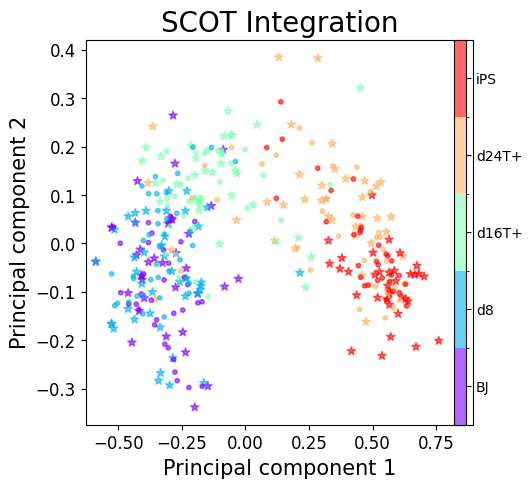

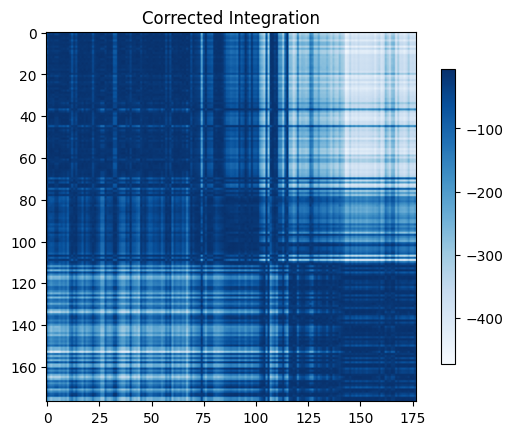

In [11]:
# check modality 1
alter_mappings = sonata.map_ambiguous_groups(data1, DiagnoseResult1.ambiguous_labels, DiagnoseResult1.ambiguous_idx)
x_aligned_best, y_aligned_best, best_mapping, _ = sonata_best_acc(x_aligned, y_aligned, label1, label2, alter_mappings, mapping)

plt_mapping_bio_labels(x_aligned_best, y_aligned_best, label1, label2, "Gene Expression", "DNA methylation", 
                       ["BJ", "d8", "d16T+", "d24T+", "iPS"], suptitle = "SCOT Integration", a = 0.6, show=True)  
plt_heatmap(np.log(best_mapping), title="Corrected Integration", show=True)